# Project: Customer Segmentation of an E-Commerce Retail.

*Name: Raza Ali*
*Matriculation-Nr: 805145* 

## Problem Statement

The aim of the project is to come up with different segments of customers on the basis of their respective market behaviour.

The results can further be used to run target campaigns for each cluster to maximize the profit.


## Work Progress

The notebook contains the following subjects:
* Importing libraries
* Loading Data
* Missing values
* RFM Analysis
* Data Insight
* Scaling Data
* Plottins
* Calculating Hopkins Score
* Modelling
* KMeans
* Expectation Maximization
* DBSCAN
* Conclusion

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from keras import Input
import keras.backend as K
from keras import layers
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Online_Retail/Online_Retail.csv", encoding = "ISO-8859-1", header= 0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Missing Values

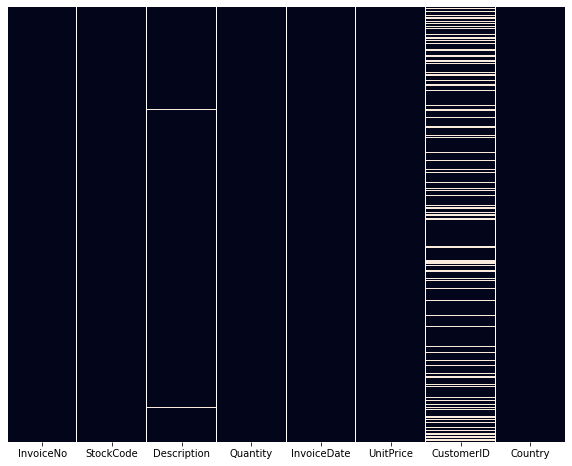

In [ ]:
plt.figure(figsize= (10,8))
mask = df.isnull()
sns.heatmap(mask,  yticklabels=False, cbar= False)

In [ ]:
missing = (df.isnull().sum(axis= 0)/df.shape[0])*100

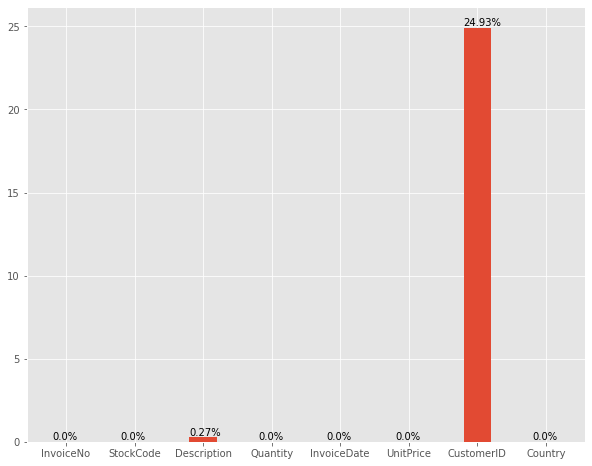

In [ ]:
# assign your bars to a variable so their attributes can be accessed
plt.style.use("ggplot")
plt.figure(figsize= (10,8))
bars = plt.bar(missing.index, height=missing, width=.4)


# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = np.round(bar.get_height(),2)
    plt.text(bar.get_x(), yval + .1, str(yval) + "%")

In [ ]:
df = df.dropna()

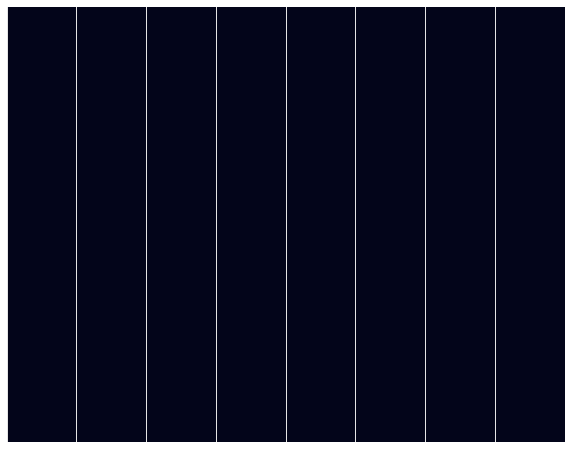

In [ ]:
plt.figure(figsize= (10,8))
mask = df.isnull()
sns.heatmap(mask,  yticklabels=False, xticklabels= False, cbar= False)

In [ ]:
df.shape

(406829, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## RFM Analysis

In [ ]:
unique_customers = df.groupby(by = ['CustomerID']).size().index
df["Amount"] = df['Quantity'] * df['UnitPrice']
monetory = df[['CustomerID', "Amount"]].groupby(by= ['CustomerID']).sum().values.reshape(-1)
recency = df[['CustomerID', 'InvoiceDate']].groupby(by= ['CustomerID']).max().values.reshape(-1)
freq = df.groupby(by= ['CustomerID']).size().values

In [ ]:
dct = {"CustomerID": unique_customers, "Monetory": monetory, "Frequency": freq, "Recency": recency}
rfm = pd.DataFrame(data= dct)
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,2011-01-18 10:17:00
1,12347.0,4310.00,182,2011-12-07 15:52:00
2,12348.0,1797.24,31,2011-09-25 13:13:00
3,12349.0,1757.55,73,2011-11-21 09:51:00
4,12350.0,334.40,17,2011-02-02 16:01:00


We know the latest date, so we subtract each buying date from the latest date to know the last time a customer bought something.

In [ ]:
rfm['Recency'] = max(df['InvoiceDate']) - rfm['Recency'] 
rfm['Recency'] = rfm['Recency'].apply(lambda x: x.total_seconds()/86400)

In [ ]:
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,12346.0,0.00,2,325.106250
1,12347.0,4310.00,182,1.873611
2,12348.0,1797.24,31,74.984028
3,12349.0,1757.55,73,18.124306
4,12350.0,334.40,17,309.867361


## Data Insight

In [ ]:
fig = px.scatter_3d(rfm, x='Monetory', y='Frequency', z='Recency')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



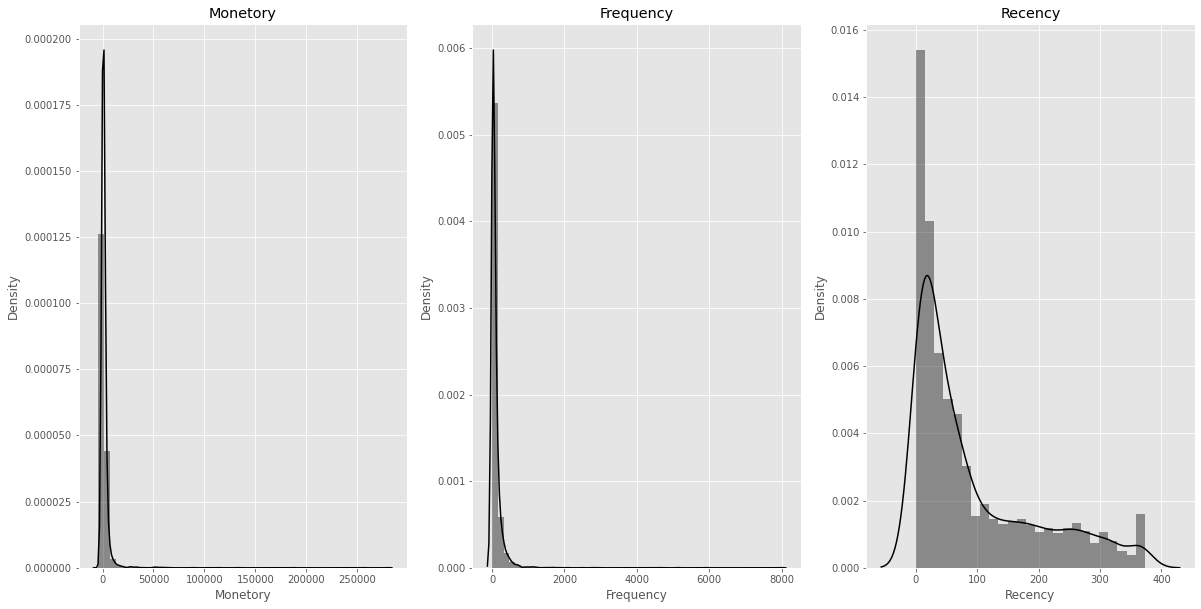

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20,10))
for i, cols in enumerate(rfm.columns[1:]):
  sns.distplot(rfm[cols], kde= True, ax = ax[i], color= 'k')
  ax[i].set_title(cols)

## Scaling Data

In [ ]:
sc = StandardScaler()
rfm.iloc[:,1:] = sc.fit_transform(rfm.iloc[:,1:])
rfm.head()

,CustomerID,Monetory,Frequency,Recency
0,12346.0,-0.231001,-0.391720,2.317782
1,12347.0,0.293432,0.382657,-0.890184
2,12348.0,-0.012316,-0.266959,-0.164590
3,12349.0,-0.017146,-0.086271,-0.728902
4,12350.0,-0.190312,-0.327188,2.166542


## Plottings

In [ ]:
def dist_plotting(rfm):
  fig, ax = plt.subplots(1, 3, figsize = (20,10))
  for i, cols in enumerate(rfm.columns[1:]):
    sns.distplot(rfm[cols], kde= True, ax = ax[i], color= 'k')
    ax[i].set_title(cols)

In [ ]:
def box_plotting(rfm):
  fig, ax = plt.subplots(1, 3, figsize = (20,10))
  sns.boxplot(rfm['Monetory'], ax= ax[0])
  sns.boxplot(rfm['Frequency'], ax= ax[1])
  sns.boxplot(rfm['Recency'], ax= ax[2])
  ax[0].set_title("Monetory")
  ax[1].set_title("Frequency")
  ax[2].set_title("Recency")

In [ ]:
fig = px.scatter_3d(rfm, x='Monetory', y='Frequency', z='Recency')
fig.show()

Just trying out for analysis purposes:

* how does the data look if we remove outliers, (However not a good approach because we loose alot of customers important information
)

In [ ]:
def whister_setting(rfm, factor = 2.5):
  q1m = np.quantile(rfm.Monetory, 0.25)
  q1f = np.quantile(rfm.Frequency, 0.25)
  q3m =  np.quantile(rfm.Monetory, 0.75)
  q3f = np.quantile(rfm.Frequency, 0.75)
  iqr_m = q3m-q1m
  iqr_f = q3f-q1f
  um = q3m + factor*iqr_m
  lm = q1m - factor*iqr_m
  uf = q3f + factor*iqr_f
  lf = q1f - factor*iqr_f
  norm = rfm[(rfm.Monetory>lm) & (rfm.Monetory<um)]
  norm = norm[(norm.Frequency>lf) & (norm.Frequency<uf)]
  return norm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



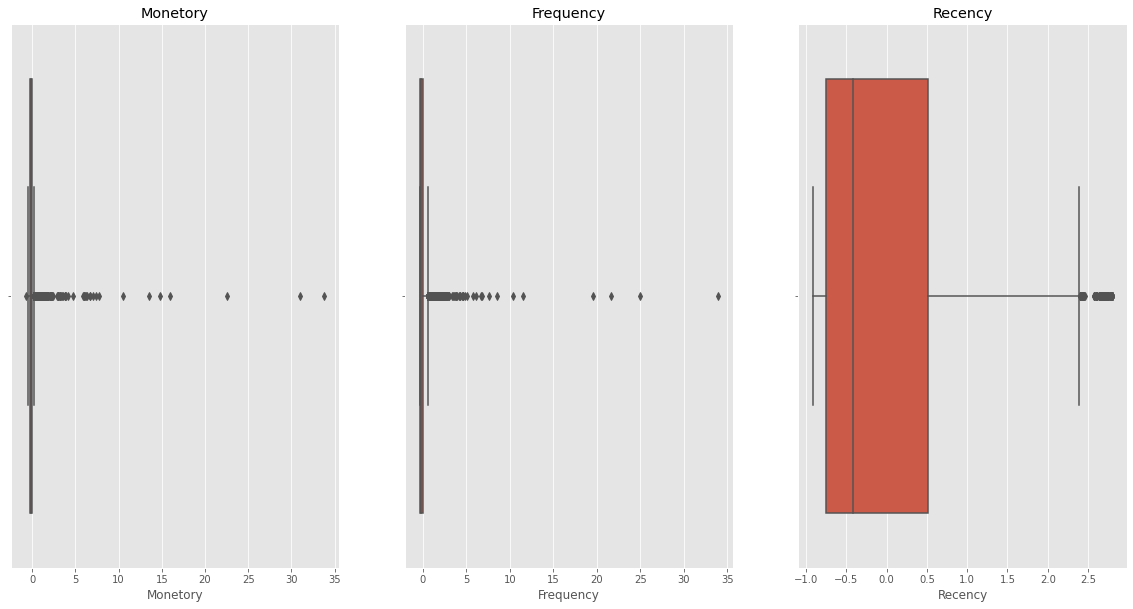

In [ ]:
box_plotting(rfm)

In [ ]:
norm = whister_setting(rfm, factor= 1.5)

Boxplots with removed outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



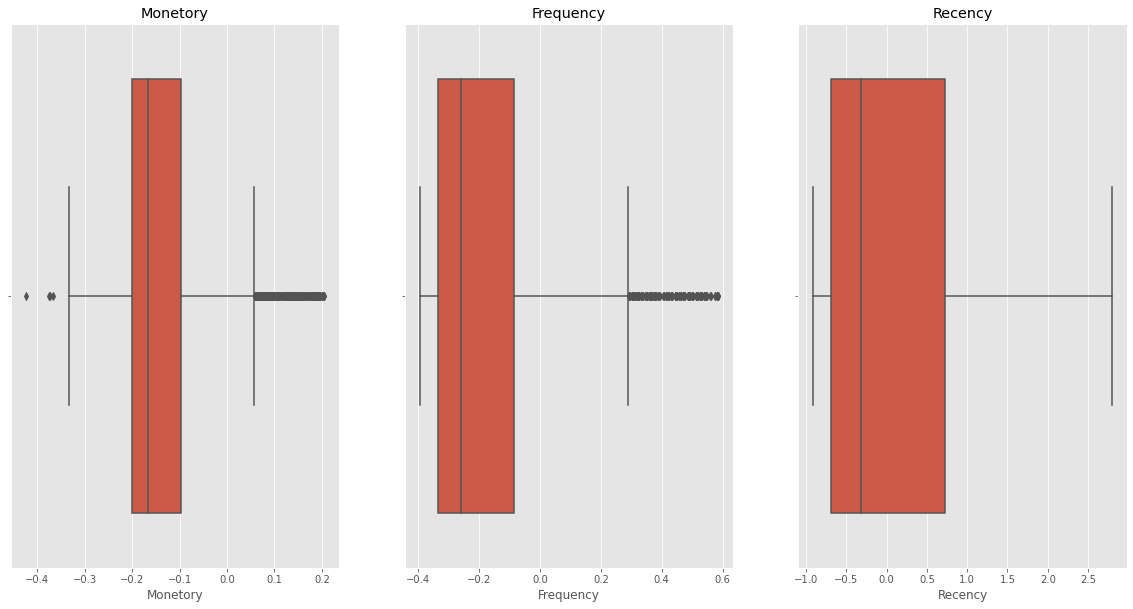

In [ ]:
box_plotting(norm)

dist plot with removed outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



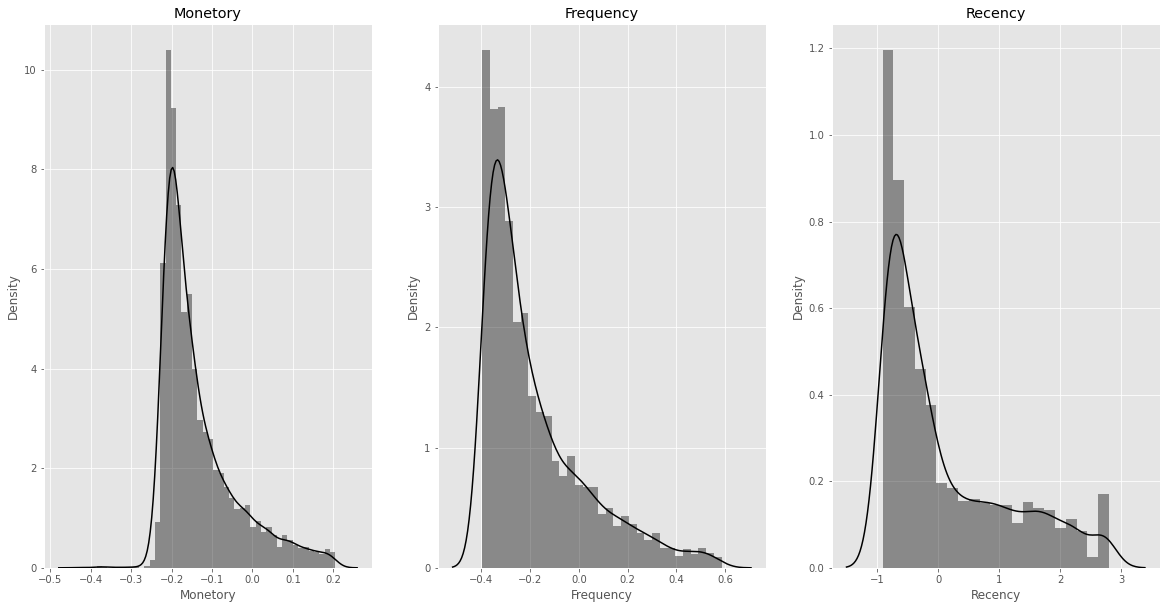

In [ ]:
dist_plotting(norm)

data with removed Outliers

In [ ]:
fig = px.scatter_3d(norm, x='Monetory', y='Frequency', z='Recency')
fig.show()

## Calculating Hopkins Score

In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = random.sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(rfm.iloc[:,1:])

0.993021096907817

The higher value of hopkins scores suggest presence of clusters.

## Modelling

## KMeans

In [ ]:
l = []
score = []
for k in range(2,15):
  kmean = KMeans(n_clusters = k, random_state=0).fit(rfm[['Monetory', "Frequency", "Recency"]])
  l.append(kmean.inertia_)
  score.append(silhouette_score(rfm.iloc[:, 1:], kmean.labels_))

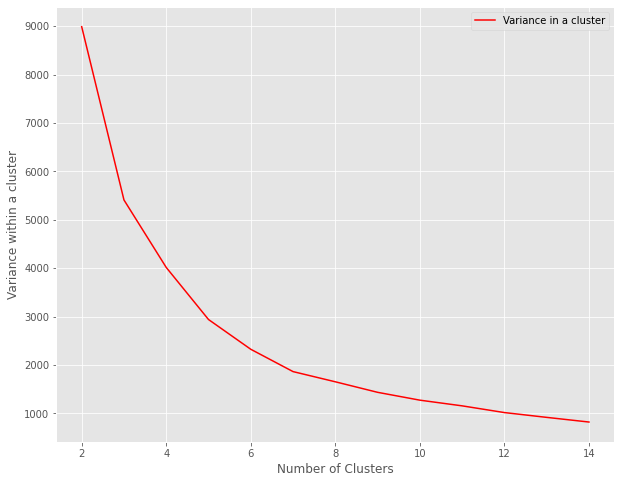

In [ ]:
plt.style.use("ggplot")
xx = range(2,15)
plt.figure(figsize=(10,8))
plt.plot(xx, l, label = "Variance in a cluster", c = 'r')
plt.xlabel("Number of Clusters")
plt.ylabel("Variance within a cluster")
plt.legend()

Text(0, 0.5, 'Silhouette Coefficient')

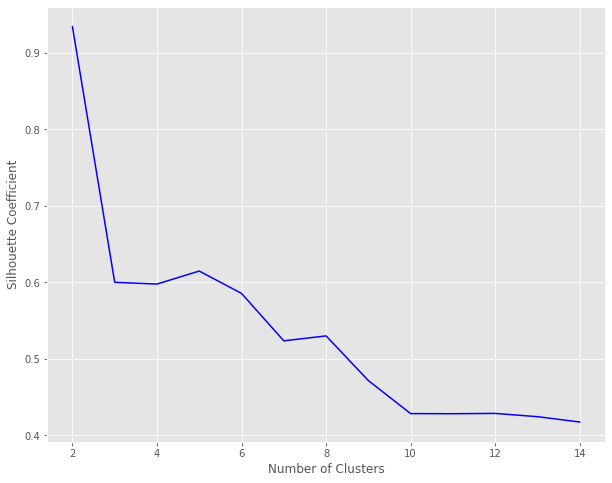

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(xx, score, label = "Silhouette_score", c = 'b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

Choosing k=5 as the optimal value due to good silhouette coefficient and relatively less variance among clusters

In [ ]:
# choosing k = 5
kmean = KMeans(n_clusters = 5, random_state=0).fit(rfm[['Monetory', "Frequency", "Recency"]])

In [ ]:
kmean_df = rfm.copy()
kmean_df['cluster'] = kmean.labels_

In [ ]:
def visualize_clusters(norm):

  PLOT = go.Figure()

  for C in np.unique(norm.cluster):
      
      PLOT.add_trace(go.Scatter3d(x = norm[norm.cluster == C]['Monetory'],
                                  y = norm[norm.cluster == C]['Frequency'],
                                  z = norm[norm.cluster == C]['Recency'],
                                  mode = 'markers', marker_size = 8, marker_line_width = 1,
                                  name = 'Cluster ' + str(C)))
      
  PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                    scene = dict(xaxis=dict(title = 'Monetory', titlefont_color = 'black'),
                                  yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                  zaxis=dict(title = 'Recency', titlefont_color = 'black')),
                    font = dict(family = "Gilroy", color  = 'black', size = 12))
  
  PLOT.show()


In [ ]:
visualize_clusters(kmean_df)

## Expectation Maximization

In [ ]:
score_gmm = []
xx = np.arange(2, 15)
for k in xx:
  gmm = GaussianMixture(n_components=k, random_state= 0)
  gmm.fit(rfm.iloc[:, 1:])
  gmm_label = gmm.predict(rfm.iloc[:, 1:])
  score_gmm.append(silhouette_score(rfm.iloc[:, 1:], gmm_label))

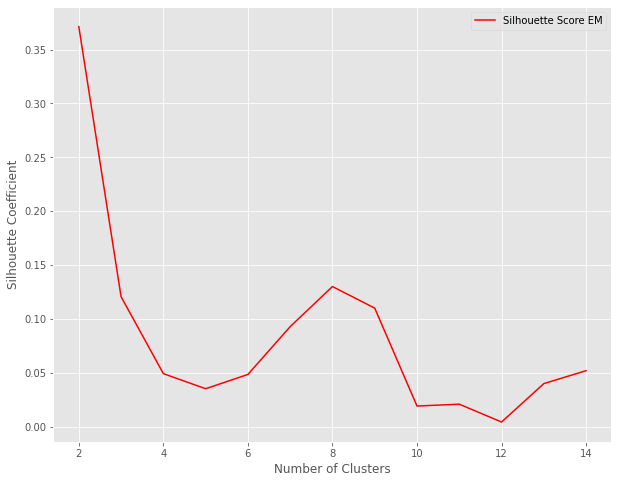

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(xx, score_gmm, label = "Silhouette Score EM", c = 'r')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.legend()

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(rfm.iloc[:, 1:])
gmm_label = gmm.predict(rfm.iloc[:, 1:])

In [ ]:
em_df = rfm.copy()
em_df['cluster'] = gmm_label

In [ ]:
visualize_clusters(em_df)

##DBSCAN

In [ ]:
def cv_silhouette_scorer(estimator, xx):
    estimator.fit(xx)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(xx.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(xx, cluster_labels)

In [ ]:
params = {'eps' : [0.01, 0.03, 0.07, 0.1, 0.15], 'min_samples': [10,12,15,17,20] }
cv = [(slice(None), slice(None))]
dbscan = DBSCAN()
clf = GridSearchCV(dbscan, params, scoring = cv_silhouette_scorer, cv = cv)
clf.fit(rfm.iloc[:,1:])

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             error_score=nan,
             estimator=DBSCAN(algorithm='auto', eps=0.5, leaf_size=30,
                              metric='euclidean', metric_params=None,
                              min_samples=5, n_jobs=None, p=None),
             iid='deprecated', n_jobs=None,
             param_grid={'eps': [0.01, 0.03, 0.07, 0.1, 0.15],
                         'min_samples': [10, 12, 15, 17, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=<function cv_silhouette_scorer at 0x7f3dd6fa1680>,
             verbose=0)

In [ ]:
results = pd.DataFrame(clf.cv_results_)

In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eps,param_min_samples,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031038,0.0,0.025330,0.0,0.01,10,"{'eps': 0.01, 'min_samples': 10}",-1.0,-1.0,0.0,21
1,0.025225,0.0,0.028324,0.0,0.01,12,"{'eps': 0.01, 'min_samples': 12}",-1.0,-1.0,0.0,21
2,0.024839,0.0,0.025106,0.0,0.01,15,"{'eps': 0.01, 'min_samples': 15}",-1.0,-1.0,0.0,21
3,0.024188,0.0,0.024891,0.0,0.01,17,"{'eps': 0.01, 'min_samples': 17}",-1.0,-1.0,0.0,21
4,0.024564,0.0,0.025128,0.0,0.01,20,"{'eps': 0.01, 'min_samples': 20}",-1.0,-1.0,0.0,21


In [ ]:
fig = px.scatter_3d(results, x='param_eps', y='param_min_samples', z='split0_test_score')
fig.show()

Text(0.5, 1.0, 'Min_sample vs Score')

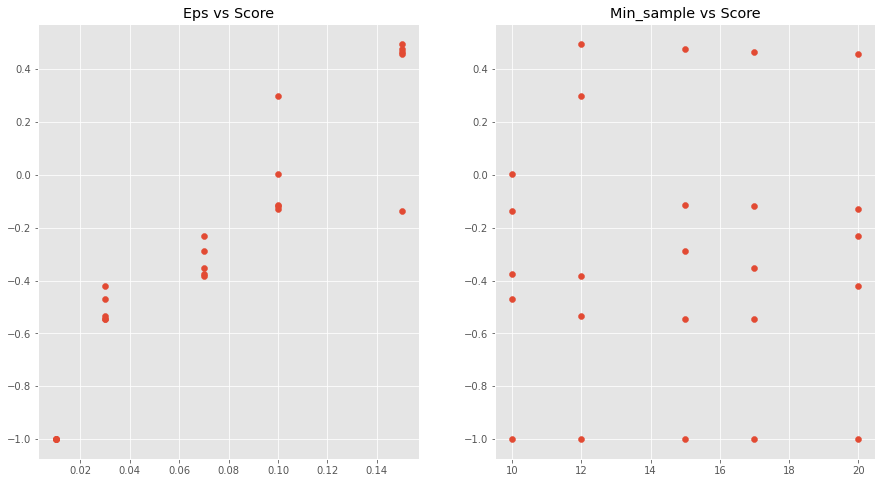

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,8))
axs[0].scatter(results.param_eps, results.split0_test_score)
axs[0].set_title("Eps vs Score")
axs[1].scatter(results.param_min_samples, results.split0_test_score)
axs[1].set_title("Min_sample vs Score")

In [ ]:
max_res = results['params'][results.split0_test_score.idxmax()]
max_res

{'eps': 0.15, 'min_samples': 12}

In [ ]:
dbscan = DBSCAN(eps = max_res['eps'], min_samples= max_res['min_samples'])
dbscan.fit(rfm.iloc[:,1:])

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0])

In [ ]:
dbscan_df = rfm
dbscan_df['cluster'] = dbscan.labels_

In [ ]:
visualize_clusters(dbscan_df)

## Conclusion

We were finally able to classify high profit customers from normal performing customers.

**What is the 80/20 rule? **

The 80/20 rule, also known as the Pareto principle, simply means that roughly 80 percent of the effects of anything you might be doing come from 20 percent of the causes.  For example, 80 percent of your sales are likely generated by about 20 percent of the items you carry or services you offer.